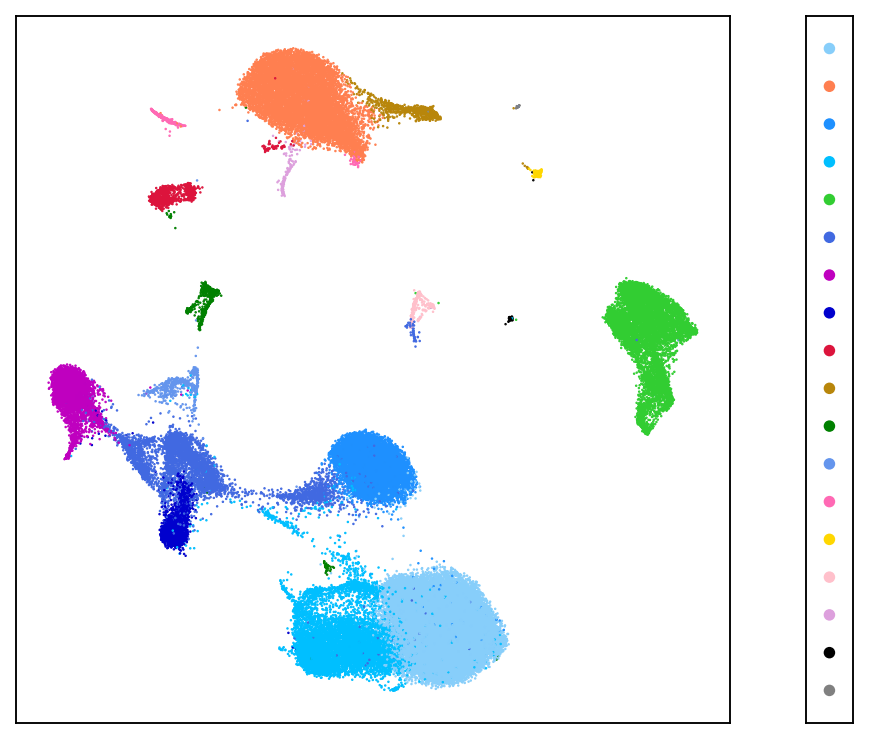

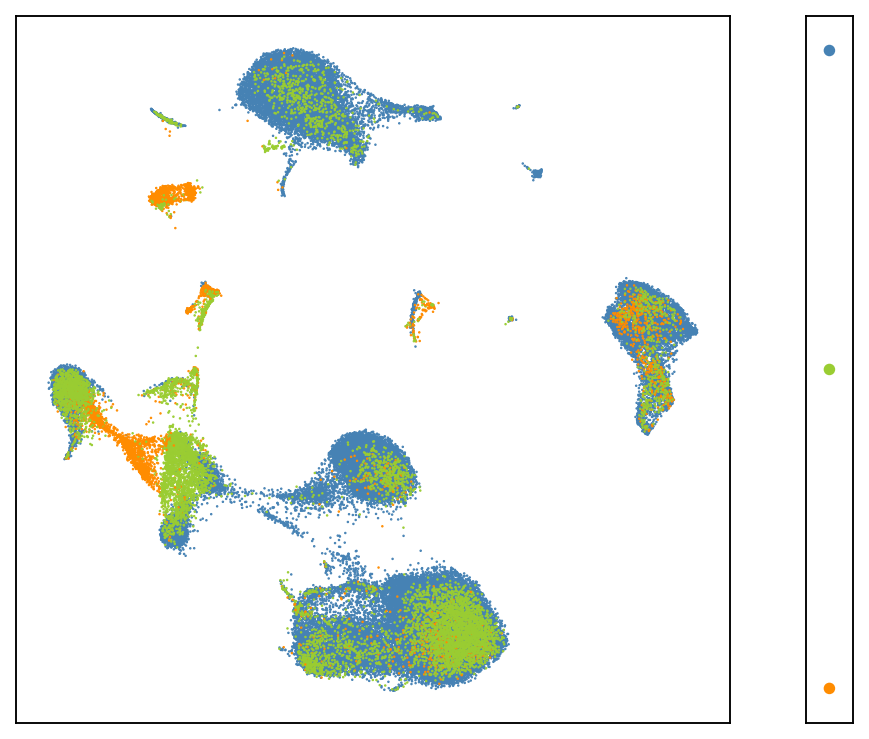

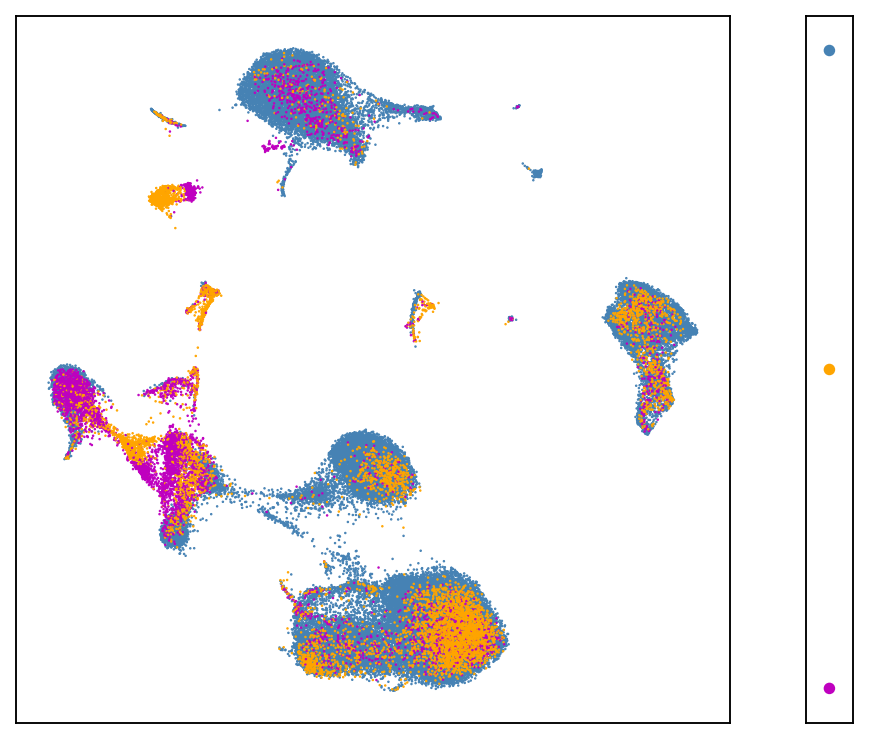

In [8]:
import numpy,pandas,random
import matplotlib.pyplot as plt
import seaborn
#
#
umap_df = pandas.read_csv('umap.csv', sep=',', index_col=0)
meta_df = pandas.read_csv('meta_data.csv', sep=',', index_col=0)
cluster_color = {0:'lightskyblue', 1:'coral', 2:'dodgerblue', 3:'deepskyblue', 4:'limegreen', 
                 5:'royalblue', 6:'m', 7:'mediumblue', 8:'crimson', 9:'darkgoldenrod', 
                 10:'green', 11:'cornflowerblue', 12:'hotpink', 14:'gold', 
                 13:'pink', 15:'plum', 16:'black', 17:'grey'}
col_color = [cluster_color[x] for x in meta_df['seurat_clusters']]
batch_name = {'P2-1':'severe stage', 'P1-1r1':'severe stage', 'P1-1r2':'severe stage', 
              'P2-2':'remisson stage', 'P2-3':'remisson stage', 'P1-2r1':'remisson stage', 
              'P1-2r2':'remisson stage', 'healthy':'healthy people'}
meta_df['patient stage'] = [batch_name[x] for x in meta_df['batch']]
meta_df.to_csv('meta_data.organized.csv', sep=',')
umap_df = umap_df.loc[meta_df.index.values]
#
fig, axes = plt.subplots(1, 2, figsize=(15,13),gridspec_kw={'width_ratios': [15, 1]}, squeeze=True)
axes[0].scatter(umap_df['UMAP_1'], umap_df['UMAP_2'], c=col_color, s=1)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].scatter(numpy.zeros(18), numpy.arange(18,0,-1), c=cluster_color.values(), s=100)
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.close() 
#
stage_color = {'severe stage':'darkorange', 'remisson stage':'yellowgreen', 'healthy people':'steelblue'}
umap_df = umap_df.loc[meta_df.index.values]
stage_c = [stage_color[x] for x in meta_df['patient stage']]
fig, axes = plt.subplots(1, 2, figsize=(15,13),gridspec_kw={'width_ratios': [15, 1]}, squeeze=True)
axes[0].scatter(umap_df['UMAP_1'], umap_df['UMAP_2'], c=stage_c, s=1)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].scatter(numpy.zeros(3), numpy.arange(3,0,-1), c=list(set(stage_color.values())), s=100)
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.close() 
#
#
stage_color = {'severe stage':'darkorange', 'remisson stage':'yellowgreen', 'healthy people':'steelblue'}
pat_color = {'P2-1':'m', 'P2-2':'m', 'P2-3':'m', 
             'P1-1r1':'orange', 'P1-1r2':'orange', 'P1-2r1':'orange', 'P1-2r2':'orange',
              'healthy':'steelblue'}
cells1 = meta_df.loc[meta_df['batch']=='healthy'].index.values
cells2 = meta_df.loc[meta_df['batch'].isin(['P2-1', 'P2-2', 'P2-3'])].index.values
cells3 = meta_df.loc[meta_df['batch'].isin(['P1-1r1', 'P1-1r2', 'P1-2r1', 'P1-2r2'])].index.values
cells23 = list(cells2)+list(cells3)
random.shuffle(cells23)
cells = list(cells1) + list(cells23)
pat_c = [pat_color[x] for x in meta_df.loc[cells,'batch']]
fig, axes = plt.subplots(1, 2, figsize=(15,13),gridspec_kw={'width_ratios': [15, 1]}, squeeze=True)
axes[0].scatter(umap_df.loc[cells,'UMAP_1'], umap_df.loc[cells,'UMAP_2'], c=pat_c, s=1)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].scatter(numpy.zeros(3), numpy.arange(3,0,-1), c=list(set(pat_color.values())), s=100)
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.close()
#
#

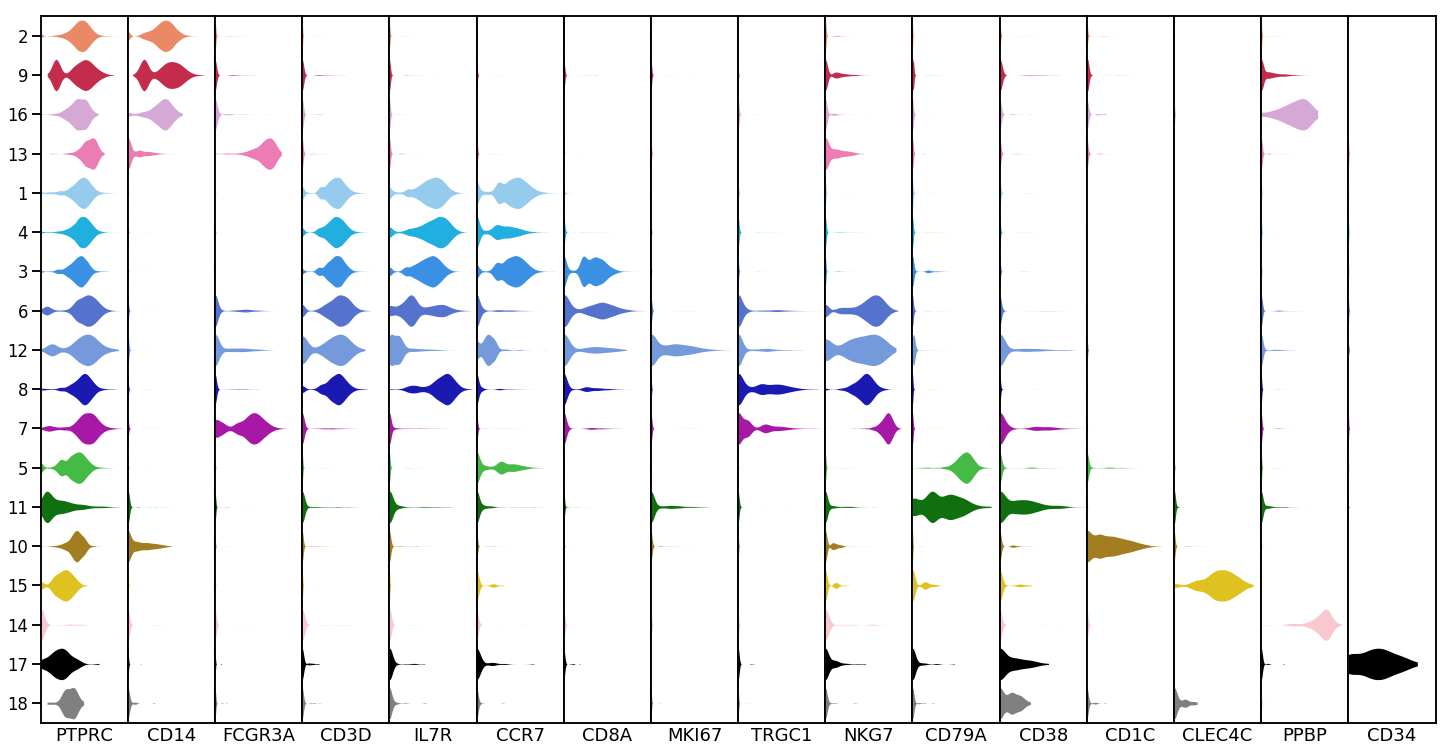

In [7]:
import numpy,pandas
import matplotlib.pyplot as plt
import seaborn
#
#
counts_df = pandas.read_csv('integrated.data.csv', sep=',', index_col=0,
                            engine='c', na_filter=False, low_memory=False)
counts_df[counts_df<0] = 0
cells_df = pandas.read_csv('meta_data.csv', sep=',', index_col=0)
#
genes = ['PTPRC', 'CD14', 'FCGR3A', 'CD3D', 'IL7R', 'CCR7', 'CD8A', 'MKI67', 'TRGC1', 'NKG7', 'CD79A', 'CD38', 
         'CD1C', 'CLEC4C', 'PPBP', 'CD34']
clusters = [1, 8, 15, 12, 0, 3, 2, 5, 11, 7, 6, 4, 10, 9, 14, 13, 16, 17]
xmax = {'PTPRC':5, 'CD14':5, 'FCGR3A':5, 'CD3D':5, 'IL7R':5, 'CCR7':4, 
        'CD8A':4, 'MKI67':4, 'TRGC1':4, 'NKG7':6, 'CD79A':5, 'CD38':3, 
         'CD1C':4, 'CLEC4C':3, 'PPBP':8, 'CD34':3}
cluster_color = {0:'lightskyblue', 1:'coral', 2:'dodgerblue', 3:'deepskyblue', 4:'limegreen', 
                 5:'royalblue', 6:'m', 7:'mediumblue', 8:'crimson', 9:'darkgoldenrod', 
                 10:'green', 11:'cornflowerblue', 12:'hotpink', 14:'gold', 
                 13:'pink', 15:'plum', 16:'black', 17:'grey'}
#
seaborn.set_context('talk')
fig, axes = plt.subplots(1, len(genes), figsize=(25,13), facecolor='w')
fig.subplots_adjust(hspace=0, wspace=0)
for igene,gene in enumerate(genes):
    gene_df = counts_df.loc[[gene]].T
    gene_df['cluster'] = cells_df.loc[gene_df.index.values, 'seurat_clusters']
    gene_df = gene_df.loc[gene_df['cluster'].isin(clusters)]
    seaborn.violinplot(data=gene_df, y='cluster', x=gene, orient='h', order=clusters, linewidth=0, 
                       palette=cluster_color, inner=None, scale='width', cut=0, ax=axes[igene])
    axes[igene].set_xticks([])
    axes[igene].set_xlim(0, xmax[gene])
    if igene!=0: 
        axes[igene].set_yticks([])
    else:
        axes[igene].set_yticklabels(list(map(str, numpy.array(clusters)+1)))
    axes[igene].set_ylabel('')
plt.show()
plt.close()
#
#